In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

* Edge Detection in the image processing world is very important because it facilitates object recognition, region segmentation of images etc... <br>
* Edges in images are areas with strong intensity contrasts. It can also be said as transition between objects or object and background<br>
* The process of edge detection significantly reduces the amount of data and filters out unneeded information, while preserving the important structural properties of an image. 
* There are many different edge detection methods, the majority of which
can be grouped into two categories: <br>
    - Gradient
        - detects the edges by looking for the maximum and minimum in the first derivative of the image.

    - Laplacian
        - searches for zero crossings in the second derivative of the image



Usually there are three steps in the edge detection process:
1) Noise reduction
    - Suppress as much noise as possible without removing edges.
2) Edge enhancement
    - Highlight edges and weaken elsewhere (high pass filter).
3) Edge localisation
    - Look at possible edges (maxima of output from previous filter) and eliminate spurious edges (often noise related).

# Sobel Operator

The operator calculates the intensity gradient of an image in every píxel using the convolution function, and the result shows the intensity magnitude changes that could be considered edges.

The sobel filter uses two 3 x 3 kernels. One for changes in the horizontal direction, and one for changes in the vertical direction. The two kernels are convolved with the original image to calculate the
approximations of the derivatives. If we define Gx and Gy as two images that contain the horizontal and
vertical derivative approximations respectively, the computations are:
$$  G_{x} = \begin{bmatrix}
            1 & 0 & -1 \\
            2 & 0 & -2 \\ 
            1 & 0 & -1 \end{bmatrix} * A
  ,
  G_{y} = \begin{bmatrix}
            -1 & -2 & -1 \\
            0 & 0 & 0 \\ 
            1 & 2 & 1 \end{bmatrix}  * A
$$ 
            and
Where A is the original source image.

In [14]:
img = cv2.imread(image_path)

In [15]:
cv2.imshow("",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray,(450,350))

In [17]:
#Apply the horizontal sobel operator with a kernel size of 3
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)

#Apply the vertical sobel operator with a kernel size of 3
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)


In [26]:
cv2.imshow("sobelx",sobelx)
cv2.imshow("sobely",sobely)
cv2.waitKey()
cv2.destroyAllWindows()

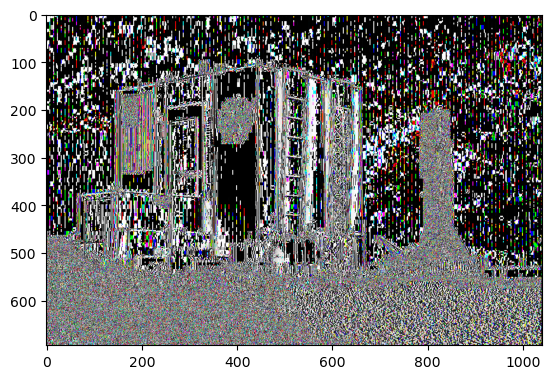

In [25]:
plt.imshow((sobelx * 255).astype(np.uint8));

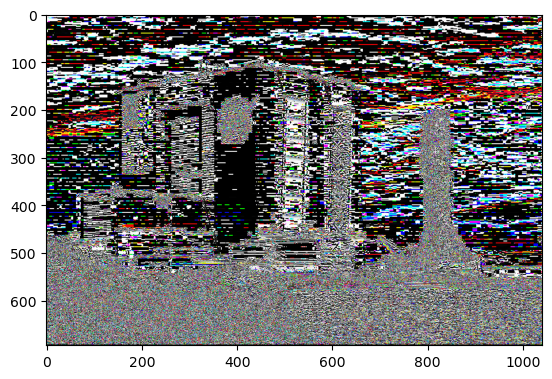

In [27]:
plt.imshow((sobely * 255).astype(np.uint8));

To deal with Warning <font color='red'>"Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)"</font> <br>
Cast the image to np.uint8 after scaling [0, 255] range will dismiss this warning. 

# Canny Edge Detection

The Canny edge detection algorithm is composed of the following steps:
1. Noise reduction;
    - Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. 
2. Gradient calculation;
    - Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ( Gx) and vertical direction ( Gy).
3. Non-maximum suppression;
    - After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient.
4. Edge Tracking by Hysteresis.
    - This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded.
    
https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

In [30]:
#The canny detector uses two parameters appart from the image:
#The minimum and maximum intensity gradient
minV = 20
maxV = 40

edges = cv2.Canny(img,minV,maxV)
cv2.imshow("canny",edges)
cv2.waitKey()
cv2.destroyAllWindows()